In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from alphadia.extraction.utils import kernel_1d, kernel_2d, kernel_2d_fft

/Users/georgwallmann/miniconda3/envs/alphadia/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


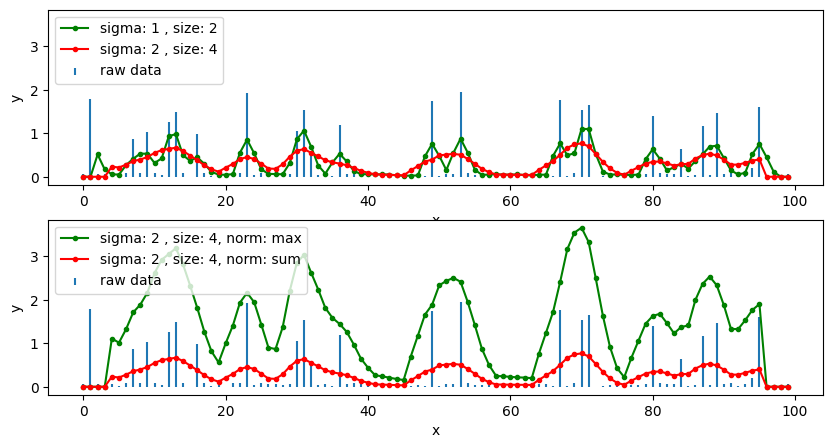

In [3]:
# create test data
# y values will be whole numbers from 0 to 100
x_sparse = np.arange(0,100)
# x values will be uniform noise with single peaks reaching out of the noise
y_sparse = np.maximum((np.random.random(100)-0.8)/0.1,0)+np.random.random(100)*0.1


fig, axs = plt.subplots(nrows=2,sharey=True, figsize=(10,5))
axs[0].stem(x_sparse, y_sparse, markerfmt=' ', basefmt= ' ', label='raw data')

kernel_1 = kernel_1d(2,1)
axs[0].plot(x_sparse, kernel_1(y_sparse), '.g-', label='sigma: 1 , size: 2')

kernel_2 = kernel_1d(4,2)
axs[0].plot(x_sparse, kernel_2(y_sparse), '.r-', label='sigma: 2 , size: 4')

axs[0].legend(loc='upper left')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')


axs[1].stem(x_sparse, y_sparse, markerfmt=' ', basefmt= ' ', label='raw data')

kernel_1 = kernel_1d(4,2,norm='max')
axs[1].plot(x_sparse, kernel_1(y_sparse), '.g-', label='sigma: 2 , size: 4, norm: max')

kernel_2 = kernel_1d(4,2,norm='sum')
axs[1].plot(x_sparse, kernel_2(y_sparse), '.r-', label='sigma: 2 , size: 4, norm: sum')
axs[1].legend(loc='upper left')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
plt.show()

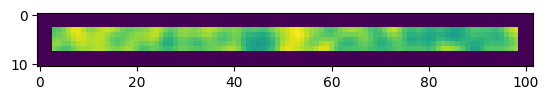

(11, 102)


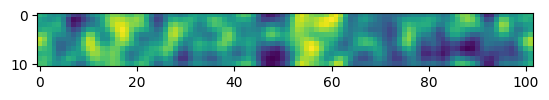

In [10]:
dense = np.random.random((11,102))

smooth = kernel_2d(3,2)(dense)

plt.imshow(smooth)
plt.show()

smooth = kernel_2d_fft(3,2)(dense)
print(smooth.shape)
plt.imshow(smooth)
plt.show()

In [12]:
dense = np.random.random((100,100))

print('Numba without FFT')
k = kernel_2d(3,2)
%timeit k(dense)

print('Numpy with FFT')
fft_k = kernel_2d_fft(3,2)
%timeit fft_k(dense)

Numba without FFT
158 ms ± 1.79 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Numpy with FFT
139 µs ± 763 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
